In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import json
import glob

from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

In [2]:
coco = COCO("./dataset/pascal_train.json") # load training annotations

loading annotations into memory...
Done (t=0.51s)
creating index...
index created!


In [3]:
coco.cats # check the category

{1: {'supercategory': 'aeroplane', 'name': 'aeroplane', 'id': 1},
 2: {'supercategory': 'bicycle', 'name': 'bicycle', 'id': 2},
 3: {'supercategory': 'bird', 'name': 'bird', 'id': 3},
 4: {'supercategory': 'boat', 'name': 'boat', 'id': 4},
 5: {'supercategory': 'bottle', 'name': 'bottle', 'id': 5},
 6: {'supercategory': 'bus', 'name': 'bus', 'id': 6},
 7: {'supercategory': 'car', 'name': 'car', 'id': 7},
 8: {'supercategory': 'cat', 'name': 'cat', 'id': 8},
 9: {'supercategory': 'chair', 'name': 'chair', 'id': 9},
 10: {'supercategory': 'cow', 'name': 'cow', 'id': 10},
 11: {'supercategory': 'diningtable', 'name': 'diningtable', 'id': 11},
 12: {'supercategory': 'dog', 'name': 'dog', 'id': 12},
 13: {'supercategory': 'horse', 'name': 'horse', 'id': 13},
 14: {'supercategory': 'motorbike', 'name': 'motorbike', 'id': 14},
 15: {'supercategory': 'person', 'name': 'person', 'id': 15},
 16: {'supercategory': 'pottedplant', 'name': 'pottedplant', 'id': 16},
 17: {'supercategory': 'sheep', 'n

In [4]:
image_ids = list(coco.imgs.keys())
x = [coco.image_info[id]["id"] for id in image_ids]

AttributeError: 'COCO' object has no attribute 'image_info'

In [4]:
# The keys in coco.imgs (dictionary) can be used to track each image
print(list(coco.imgs.keys())[:20])
print(len(list(coco.imgs.keys())[1080:]))
print(coco.imgs[736])
print(coco.imgs[736]['file_name'])

[736, 1392, 890, 1178, 1065, 265, 410, 806, 982, 272, 15, 766, 734, 227, 649, 373, 222, 351, 765, 425]
269
{'file_name': '2009_001816.jpg', 'id': 736, 'height': 375, 'width': 500}
2009_001816.jpg


In [5]:
imgIds = 736 # Use the key above to retrieve information of the image
img_info = coco.loadImgs(ids=[imgIds])
print(img_info)

[{'file_name': '2009_001816.jpg', 'id': 736, 'height': 375, 'width': 500}]


(375, 500, 3)


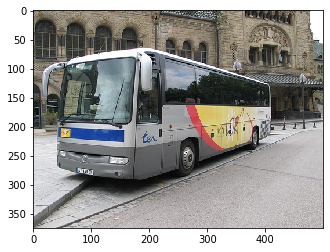

In [6]:
image = cv2.imread('./dataset/train_images/'+img_info[0]['file_name'])[:,:,::-1] # In your implementation, you should find this image in **train_images/** folders
plt.imshow(image)
print(image.shape)

In [7]:
# Use the imgIds to find all instance ids of the image
annids = coco.getAnnIds(imgIds=imgIds)
print(annids)

[1742]


In [8]:
anns = coco.loadAnns(annids)
print("Number of instances: ", len(annids))

Number of instances:  1


In [24]:
instance_id = 0
print(anns[instance_id].keys()) # check the information of the first instance of the image

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])


In [12]:
class_ids = sorted(coco.getCatIds())
for i in class_ids:
    print(coco.loadCats(i)[0]["name"])

aeroplane
bicycle
bird
boat
bottle
bus
car
cat
chair
cow
diningtable
dog
horse
motorbike
person
pottedplant
sheep
sofa
train
tvmonitor


In [39]:
print("Polygons of segmenatation:      ", anns[instance_id]['segmentation'][0][:18])
print("Image id of this instance:      ", anns[instance_id]['image_id'])
print("Bounding box of this instance:  ", anns[instance_id]['bbox'])
print("Category_id:                    ", anns[instance_id]['category_id'])
print(len(anns[instance_id]['segmentation']))

Polygons of segmenatation:       [90, 257, 88, 259, 89, 260, 89, 261, 91, 263, 92, 263, 94, 261, 93, 260, 93, 259]
Image id of this instance:       5
Bounding box of this instance:   [79, 203, 173, 297]
Category_id:                     2
6


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ...  True  True False]
 [False False False ...  True  True False]
 [False False False ... False False False]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... Fa

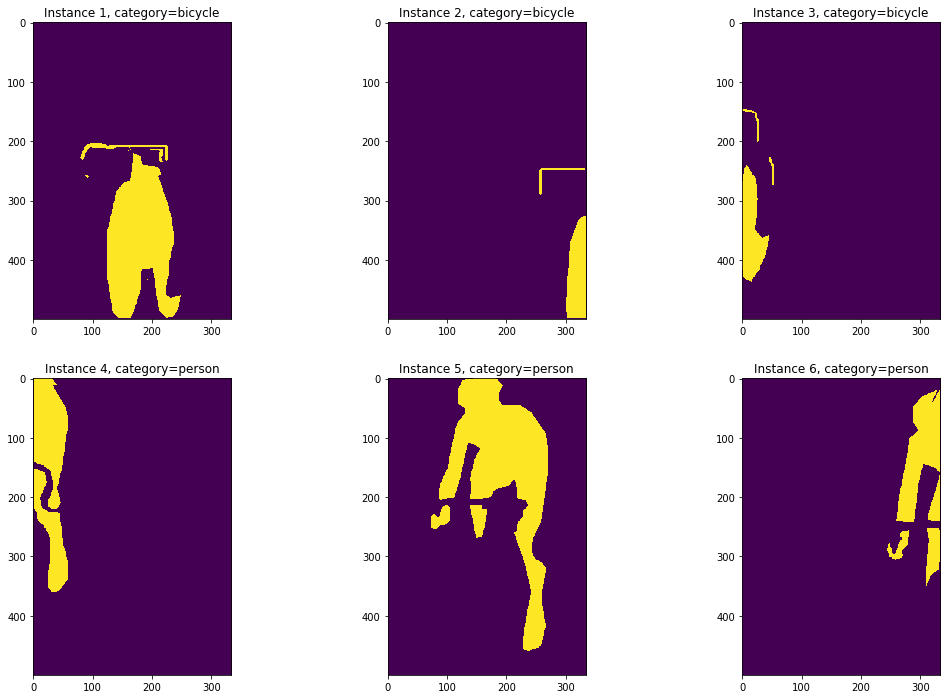

In [49]:
plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
for i in range(len(annids)):
    mask = coco.annToMask(anns[i])
    y = mask >= 1
    big = np.max(mask)
    rle=coco.annToRLE(anns[i])
    cate = anns[i]['category_id']
    plt.subplot(2, 3, i+1)
    plt.title("Instance {}, category={}".format(i+1, coco.cats[cate]['name']))
    plt.imshow(mask)
    print(mask)
    print(y)

In [50]:
coco.annToMask(anns)

TypeError: list indices must be integers or slices, not str

In [15]:
cocoGt = COCO("./dataset/test.json")

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [16]:
# from utils import binary_mask_to_rle

In [17]:
# coco_dt = []

# for imgid in cocoGt.imgs:
#     image = cv2.imread("./dataset/test_images/" + coco.loadImgs(ids=imgid)[0]['file_name'])[:,:,::-1] # load image
#     masks, categories, scores = model.predict(image) # run inference of your model
#     n_instances = len(score)    
#     if len(categories) > 0: # If any objects are detected in this image
#         for i in range(n_instances): # Loop all instances
#             # save information of the instance in a dictionary then append on coco_dt list
#             pred = {}
#             pred['image_id'] = imgid # this imgid must be same as the key of test.json
#             pred['category_id'] = int(categories[i])
#             pred['segmentation'] = binary_mask_to_rle(masks[:,:,i]) # save binary mask to RLE, e.g. 512x512 -> rle
#             pred['score'] = float(scores[i])
#             coco_dt.append(pred)

NameError: name 'model' is not defined

In [ ]:
# with open("submission.json", "w") as f:
#     json.dump(coco_dt, f)

In [ ]:
# cocoGt = COCO("pascal_train.json")

In [ ]:
# cocoDt = cocoGt.loadRes("submission_train.json")

# cocoEval = COCOeval(cocoGt, cocoDt, 'segm')
# cocoEval.evaluate()
# cocoEval.accumulate()
# cocoEval.summarize()

In [18]:
for Mask_RCNN.mrcnn import model

SyntaxError: invalid syntax (<ipython-input-18-6eb922edacc8>, line 1)

In [1]:
from keras.utils.data_utils import get_file
TF_WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/'\
                         'releases/download/v0.2/'\
                         'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                        TF_WEIGHTS_PATH_NO_TOP,
                        cache_subdir='models',
                        md5_hash='a268eb855778b3df3c7506639542a6af')
model.load_weights(model.get_imagenet_weights(), by_name=True)

94658560/94653016 [==============================] - 11s 0us/step


NameError: name 'model' is not defined

In [5]:
image_dir = os.path.join(ROOT_DIR, "dataset/test_images/")
PATH = os.path.join(ROOT_DIR, "dataset/test.json")
coco = COCO(PATH) # load testing annotations

NameError: name 'os' is not defined